# Uncertainty analysis

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from SALib.analyze import sobol

from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers
)


from ema_workbench.em_framework.salib_samplers import get_SALib_problem



## Initiate model

In [29]:
from ema_workbench import Model, RealParameter, TimeSeriesOutcome
from ship_model import ship_model

model = Model('Ships', function=ship_model)

model.time_horizon = 2100-2023+1

model.uncertainties = [RealParameter('DWT_err', 0.7, 1.3),
                       RealParameter('lifetime_err', 0.7, 1.3),
                        RealParameter('mat_err', .7, 1.3),
                       RealParameter('GDP_err', 0.7, 1.3),
                       RealParameter('rate_err', .7, 1.3),
                       RealParameter('degr_rate_err', .7, 1.3)]
#DWT_err=1,lifetime_err=1, mat_err=1, GDP_err=1, rate_err=1, degr_rate_err=1

model.outcomes = [TimeSeriesOutcome('south_SSP1-26_north_SSP1-26'), TimeSeriesOutcome('south_SSP1-26_north_SSP2-26'),
       TimeSeriesOutcome('south_SSP1-26_north_degrowth'), TimeSeriesOutcome('south_SSP2-26_north_SSP1-26'),
       TimeSeriesOutcome('south_SSP2-26_north_SSP2-26'), TimeSeriesOutcome('south_SSP2-26_north_degrowth'),
       TimeSeriesOutcome('south_degrowth_north_SSP1-26'), TimeSeriesOutcome('south_degrowth_north_SSP2-26'),
       TimeSeriesOutcome('south_degrowth_north_degrowth')]



First we try it sequential

In [30]:
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)


n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios)

experiments, outcomes = results



[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [22:38<00:00,  1.36s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
print(outcomes)

{'south_SSP1-26_north_SSP1-26': array([[-0.79095224,  0.82980593,  0.84276008, ...,  2.11460925,
         2.10211508,  2.1358125 ],
       [-1.0510575 ,  0.86106098,  0.87553473, ...,  2.47913548,
         2.46531919,  2.4876631 ],
       [-0.61498513,  0.8584894 ,  0.87284397, ...,  2.35808175,
         2.34144426,  2.38355617],
       ...,
       [-0.8635414 ,  0.86450904,  0.87745889, ...,  2.43340126,
         2.42095428,  2.44797935],
       [-1.66757261,  0.86271136,  0.88771604, ...,  3.04041178,
         3.01775657,  3.03469837],
       [-0.55556457,  0.84102577,  0.85199486, ...,  2.17019772,
         2.16120783,  2.1960718 ]]), 'south_SSP1-26_north_SSP2-26': array([[-0.70346445,  0.83869536,  0.85367571, ...,  1.98208651,
         1.93643416,  1.932912  ],
       [-0.9033506 ,  0.87094454,  0.88771281, ...,  2.491078  ,
         2.44357393,  2.43968475],
       [-0.54824278,  0.86824539,  0.88489686, ...,  2.17073452,
         2.12066362,  2.11768017],
       ...,
       [-0.

In [6]:
for k, v in outcomes.items():
    print(k, v.shape)

# k = experiments 78 = timepoints

south_SSP1-26_north_SSP1-26 (100, 78)
south_SSP1-26_north_SSP2-26 (100, 78)
south_SSP1-26_north_degrowth (100, 78)
south_SSP2-26_north_SSP1-26 (100, 78)
south_SSP2-26_north_SSP2-26 (100, 78)
south_SSP2-26_north_degrowth (100, 78)
south_degrowth_north_SSP1-26 (100, 78)
south_degrowth_north_SSP2-26 (100, 78)
south_degrowth_north_degrowth (100, 78)


In [8]:
for k in outcomes.items():
    print(k,)

('south_SSP1-26_north_SSP1-26', array([[-0.79095224,  0.82980593,  0.84276008, ...,  2.11460925,
         2.10211508,  2.1358125 ],
       [-1.0510575 ,  0.86106098,  0.87553473, ...,  2.47913548,
         2.46531919,  2.4876631 ],
       [-0.61498513,  0.8584894 ,  0.87284397, ...,  2.35808175,
         2.34144426,  2.38355617],
       ...,
       [-0.8635414 ,  0.86450904,  0.87745889, ...,  2.43340126,
         2.42095428,  2.44797935],
       [-1.66757261,  0.86271136,  0.88771604, ...,  3.04041178,
         3.01775657,  3.03469837],
       [-0.55556457,  0.84102577,  0.85199486, ...,  2.17019772,
         2.16120783,  2.1960718 ]]))
('south_SSP1-26_north_SSP2-26', array([[-0.70346445,  0.83869536,  0.85367571, ...,  1.98208651,
         1.93643416,  1.932912  ],
       [-0.9033506 ,  0.87094454,  0.88771281, ...,  2.491078  ,
         2.44357393,  2.43968475],
       [-0.54824278,  0.86824539,  0.88489686, ...,  2.17073452,
         2.12066362,  2.11768017],
       ...,
       [-0

In [11]:
outcome_names =[]

for outcome in model.outcomes:
    outcome_names.append(outcome.name)

print(outcome_names)

['south_SSP1-26_north_SSP1-26', 'south_SSP1-26_north_SSP2-26', 'south_SSP1-26_north_degrowth', 'south_SSP2-26_north_SSP1-26', 'south_SSP2-26_north_SSP2-26', 'south_SSP2-26_north_degrowth', 'south_degrowth_north_SSP1-26', 'south_degrowth_north_SSP2-26', 'south_degrowth_north_degrowth']


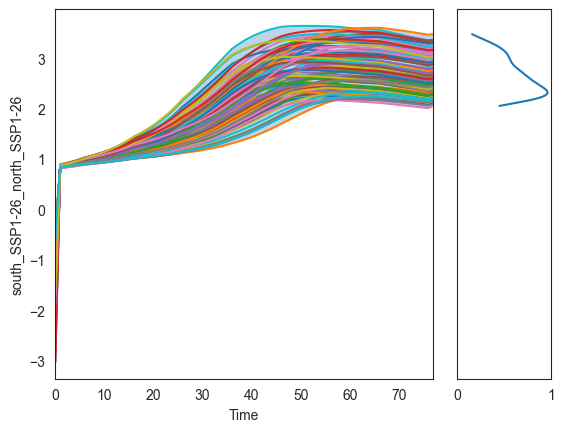

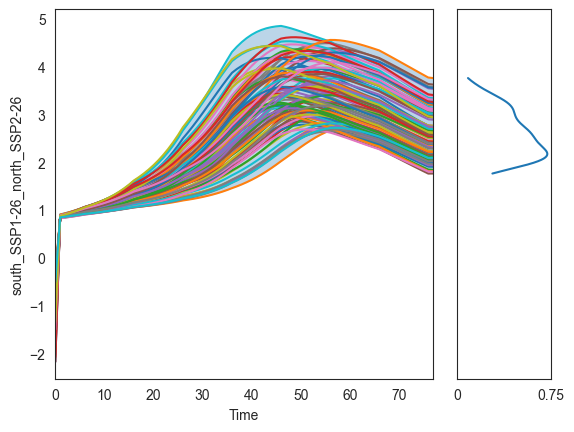

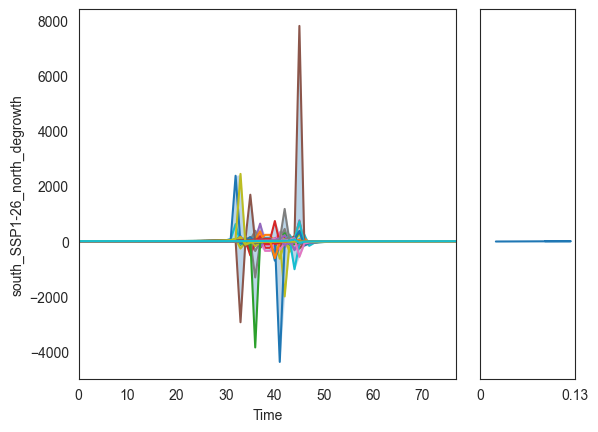

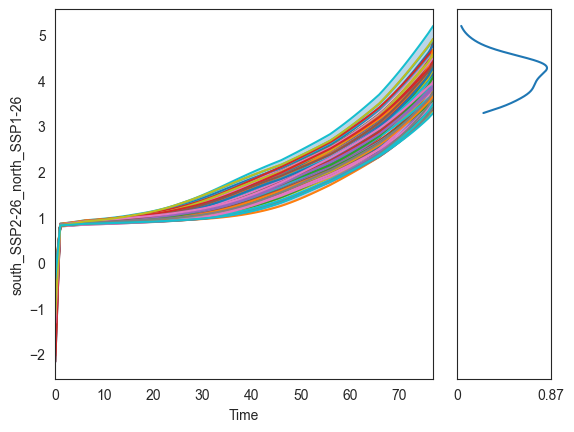

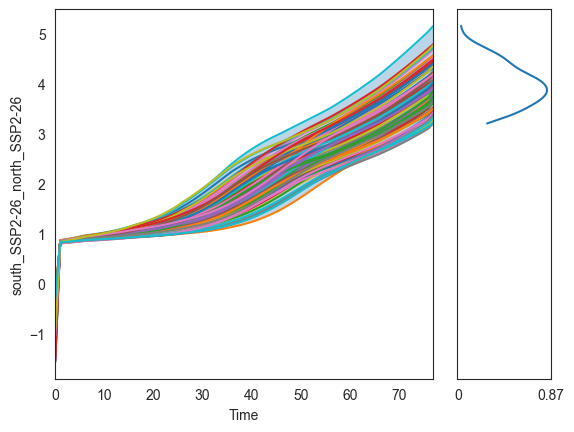

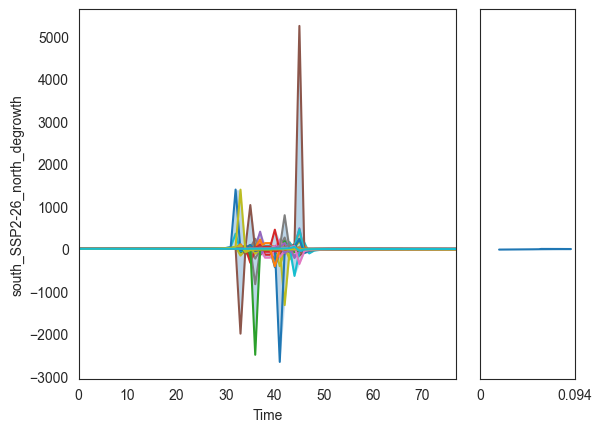

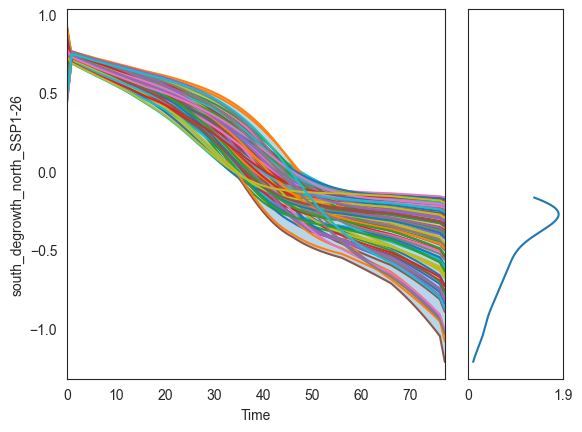

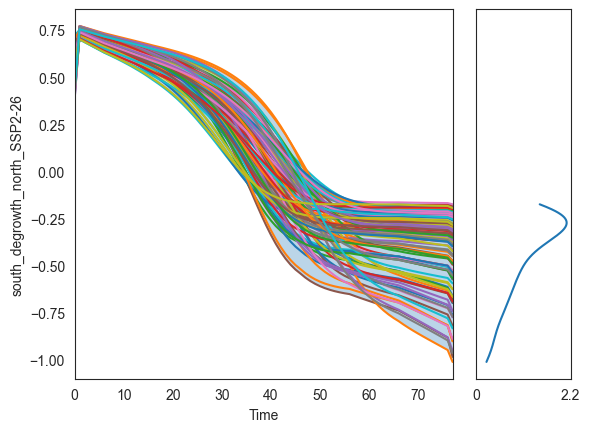

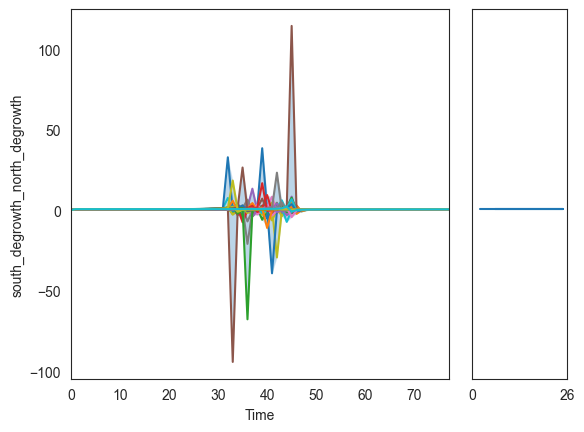

In [28]:
from ema_workbench.analysis.plotting import lines, Density

#fig, axes = plt.subplots(3, 3)

for i, outcome in enumerate(outcome_names):
    experiments_to_show = np.arange(0, experiments.shape[0], 1)

    #row = i // 3
    #col = i % 3

    lines(experiments, outcomes, outcomes_to_show=outcome,
        show_envelope=True, density=Density.KDE, titles=None,
        experiments_to_show=experiments_to_show)

plt.show()

### KDE explanation:

In statistics, kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights. KDE answers a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.[1][2] One of the famous applications of kernel density estimation is in estimating the class-conditional marginal densities of data when using a naive Bayes classifier,[3][4] which can improve its prediction accuracy.[3] Scource: <https://en.wikipedia.org/wiki/Kernel_density_estimation>

## Lets also try a subspace partitioning